In [1]:
import pandas as pd

In [2]:
df_pdbbind = pd.read_parquet('data/pdbbind.parquet')
df_pdbbind = df_pdbbind[['seq','smiles','affinity_uM']]

In [3]:
df_pdbbind.head()

seq  \
0  MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1  APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2  VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3  AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4  YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   

                                              smiles  affinity_uM  
0                          CCCCCCCCCCCCCCCCCCCC(=O)O        0.026  
1  OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...      500.000  
2  COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...        0.023  
3  OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...        6.430  
4  CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...        0.185

In [4]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import numpy as np

def get_maccs(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        arr = np.packbits([0 if c=='0' else 1 for c in MACCSkeys.GenMACCSKeys(mol).ToBitString()])
        return np.pad(arr,(0,3)).view(np.uint32)
    except Exception:
        pass

In [5]:
df_bindingdb = pd.read_parquet('data/bindingdb.parquet')
df_bindingdb = df_bindingdb[['seq','Ligand SMILES','affinity_uM']].rename(columns={'Ligand SMILES': 'smiles'})

In [6]:
df_bindingdb.head()

seq  \
0  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
1  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   

                                              smiles  affinity_uM  
0      COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1      0.00024  
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...      0.00025  
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...      0.00041  
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...      0.00080  
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...      0.00099

In [7]:
df_moad = pd.read_parquet('data/moad.parquet')
df_moad = df_moad[['seq','smiles','affinity_uM']]

In [8]:
df_moad

seq  \
0      NYIVPGEYRVAEGEIEINAGREKTTIRVSNTGDRPIQVGSHIHFVE...   
1      NYIVPGEYRVAEGEIEINAGREKTTIRVSNTGDRPIQVGSHIHFVE...   
2      MEGMRRPTPTVYVGRVPIGGAHPIAVQSMTNTPTRDVEATTAQVLE...   
3      MEGMRRPTPTVYVGRVPIGGAHPIAVQSMTNTPTRDVEATTAQVLE...   
4      MTDMSIKFELIDVPIPQGTNVIIGQAHFIKTVEDLYEALVTSVPGV...   
...                                                  ...   
25420  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25421  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25422  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25423  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25424  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   

                                                  smiles  affinity_uM  
0                                             NP(=O)(N)O     0.000620  
1                                               CC(=O)NO     2.600000  
2                               C#CCCOP(=O)(O)OP(=O)(O)O     0.580000  
3                                C#CCOP(=O)(O)OP(=O)(O)O     0.770000  
4      c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...    15.000000  
...                                                  ...          ...  
25420                                               None   127.226463  
25421                                               None   127.226463  
25422                                               None   169.204738  
25423                                               None   169.204738  
25424                                               None   169.204738  

[25425 rows x 3 columns]

In [9]:
df_biolip = pd.read_parquet('data/biolip.parquet')
df_biolip = df_biolip[['seq','smiles','affinity_uM']]

In [10]:
df_biolip

seq  \
38      PYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASC...   
43      MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   
53      EKKSINECDLKGKKVLIRVDFNVPVKNGKITNDYRIRSALPTLKKV...   
54      MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   
55      MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...   
...                                                   ...   
105118  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
105119  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
105124  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
105133  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
105138  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                   smiles  affinity_uM  
38                CC[C@H](C(=O)c1ccc(c(c1Cl)Cl)OCC(=O)O)C       1.5000  
43      OC(=O)c1cc(/N=N/c2ccc(cc2)S(=O)(=O)Nc2ccccn2)c...      24.0000  
53      O[C@@H]1[C@@H](CO[P@](=O)(O[P@@](=O)(C(CCCC(P(...       6.0000  
54      CCCCCCSC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(...      10.0000  
55                                               c1ccccc1     175.0000  
...                                                   ...          ...  
105118  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045  
105119  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045  
105124  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...     125.0000  
105133  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...       2.0000  
105138                                       CC[Se]C(=N)N       0.0390  

[13645 rows x 3 columns]

In [11]:
df_all = pd.concat([df_pdbbind,df_bindingdb,df_moad,df_biolip]).reset_index()

In [12]:
len(df_all)

2283641

In [13]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df_all['maccs'] = df_all['smiles'].parallel_apply(get_maccs)

In [16]:
df_all.to_parquet('data/all_maccs.parquet')

In [17]:
import numpy as np

In [18]:
len(df_all)

2283641

In [19]:
df_all = pd.read_parquet('data/all_maccs.parquet')
df_all = df_all.dropna().reset_index(drop=True)

In [25]:
len(df_all)

2277323

In [26]:
maccs = df_all['maccs'].to_numpy()
#df_reindex[df_reindex.duplicated(keep='first')].reset_index()

In [27]:
df_maccs = pd.DataFrame(np.vstack(maccs))

In [28]:
df_maccs.dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
5    int64
dtype: object

In [29]:
df_expand = pd.concat([df_all[['seq','smiles','affinity_uM']],df_maccs],axis=1)

In [30]:
df_expand

seq  \
0        MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1        APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2        VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3        AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4        YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   
...                                                    ...   
2277318  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
2277319  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
2277320  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
2277321  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
2277322  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                    smiles  affinity_uM  \
0                                CCCCCCCCCCCCCCCCCCCC(=O)O       0.0260   
1        OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...     500.0000   
2        COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...       0.0230   
3        OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...       6.4300   
4        CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...       0.1850   
...                                                    ...          ...   
2277318  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045   
2277319  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045   
2277320  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...     125.0000   
2277321  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...       2.0000   
2277322                                       CC[Se]C(=N)N       0.0390   

                  0           1           2           3           4    5  
0                 0           0   805306368   272271360   890245320  136  
1        2147483648  3242590208  1914732547   994116706  3748288829  124  
2            131072  1109655552  2123376961  3477340882  2951175957  252  
3                 0     6685696  2033191680  1345701844  2133187096  220  
4           1048576  1107427332  2109513024  4081492984  4026260436  252  
...             ...         ...         ...         ...         ...  ...  
2277318       65536      393216   964698368   369403648  4284858000  252  
2277319       65536      393216   964698368   369403648  4284858000  252  
2277320    67108864  1115688962  1771869508  4018431718  3744193341  124  
2277321     2097152      137216   958148868  1746307978  2067783280  204  
2277322          16        6144   537396736     2170880  1510015504  192  

[2277323 rows x 9 columns]

In [31]:
df_expand.columns

Index(['seq', 'smiles', 'affinity_uM', 0, 1, 2, 3, 4, 5], dtype='object')

In [32]:
df_reindex = df_expand.set_index([0,1,2,3,4,5,'seq'])

In [33]:
df_reindex.columns

Index(['smiles', 'affinity_uM'], dtype='object')

In [34]:
df_nr = df_reindex[~df_reindex.duplicated(keep='first')].reset_index()
df_nr = df_nr.drop(columns=[0,1,2,3,4,5])

In [36]:
# final sanity checks

In [37]:
df_nr['neg_log10_affinity_M'] = 6-np.log(df_nr['affinity_uM'])/np.log(10)

/ccs/proj/stf006/glaser/conda-envs/dask/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
df_nr

seq  \
0        MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1        APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2        VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3        AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4        YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   
...                                                    ...   
1838495  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
1838496  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
1838497  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
1838498  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
1838499  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                    smiles  affinity_uM  \
0                                CCCCCCCCCCCCCCCCCCCC(=O)O       0.0260   
1        OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...     500.0000   
2        COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...       0.0230   
3        OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...       6.4300   
4        CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...       0.1850   
...                                                    ...          ...   
1838495  O=C[C@@H](NC(=O)[C@H](Cc1ccc(cc1)OS(O)(O)O)NC(...       8.0000   
1838496  CC(C[C@@H](C(=O)N1C=CC[C@H]1C(=O)N)NC(=O)[C@@H...       8.0000   
1838497  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045   
1838498  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...       2.0000   
1838499                                       CC[Se]C(=N)N       0.0390   

         neg_log10_affinity_M  
0                    7.585027  
1                    3.301030  
2                    7.638272  
3                    5.191789  
4                    6.732828  
...                       ...  
1838495              5.096910  
1838496              5.096910  
1838497              8.346787  
1838498              5.698970  
1838499              7.408935  

[1838500 rows x 4 columns]

In [52]:
df = df_nr[np.isfinite(df_nr['neg_log10_affinity_M'])].copy()

In [53]:
from rdkit import Chem
def make_canonical(smi):
    try:
        return Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    except:
        return smi

In [54]:
df['smiles_can'] = df['smiles'].parallel_apply(make_canonical)

In [55]:
df = df[(df['neg_log10_affinity_M']>0) & (df['neg_log10_affinity_M']<15)].reset_index()

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
df['affinity'] = scaler.fit_transform(df['neg_log10_affinity_M'].values.reshape(-1,1))

In [59]:
scaler.mean_, scaler.var_

(array([6.50604534]), array([2.43319576]))

In [60]:
df = df.drop(columns='index')

In [61]:
#df.to_parquet('data/all.parquet')
#df = pd.read_parquet('data/all.parquet')

In [62]:
df.columns

Index(['seq', 'smiles', 'affinity_uM', 'neg_log10_affinity_M', 'smiles_can',
       'affinity'],
      dtype='object')

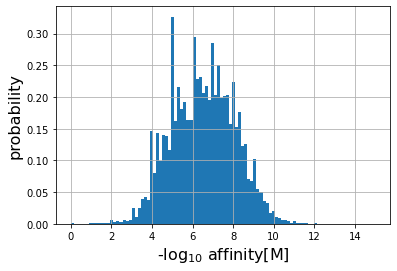

In [63]:
ax = df['neg_log10_affinity_M'].hist(bins=100,density=True)
ax.set_xlabel('-$\log_{10}$ affinity[M]',fontsize=16)
ax.set_ylabel('probability',fontsize=16)
ax.figure.savefig('affinity_neglog10_M.pdf')

In [64]:
len(df)

1836729

In [65]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 1,
 'n_samples_seen_': 1836729,
 'mean_': array([6.50604534]),
 'var_': array([2.43319576]),
 'scale_': array([1.55987043])}

In [66]:
# output the normalization

import json

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.int64):
            return int(obj)
        return json.JSONEncoder.default(self, obj)
    
json.dump(scaler.__dict__,open('data/scaling.json','w'),cls=NumpyEncoder)

**without KRAS**

In [67]:
smiles_sotorasib = 'C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc(-c4c(O)cccc4F)c(F)cc23)[C@@H](C)C1'
seq_kras_wt = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM'

In [68]:
df_nokras = df[~df.seq.str.startswith(seq_kras_wt[:20])]

In [69]:
len(df_nokras)

1836326

In [70]:
df_nokras.to_parquet('data/all_nokras.parquet')

**with covalently binding ligands only**

In [71]:
from rdkit.Chem import SDMolSupplier
suppl = SDMolSupplier('data/CovPDB_ligands.sdf')


In [72]:
from rdkit import Chem
cov_smiles = [Chem.MolToSmiles(m) for m in suppl]

RDKit WARNING: [13:20:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [13:20:37] Warning: molecule is tagged as 3D, but all Z coords are zero


In [74]:
df_cov = df[df['smiles'].isin(cov_smiles)]

In [75]:
df_cov.reset_index(drop=True).to_parquet('data/cov.parquet')

In [ ]:
l